In [1]:
import pandas as pd

df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [3]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data has been prepared and split.")

Data has been prepared and split.


In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [5]:
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.9059011844150826
Mean Squared Error: 2.9077569102710896


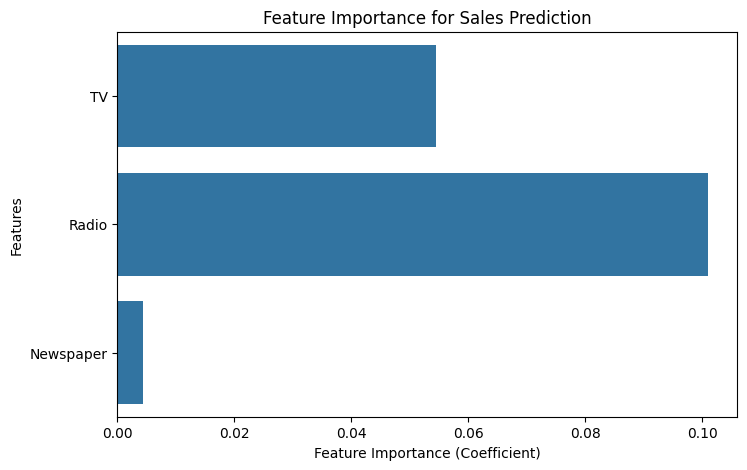

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a series with feature names and their coefficients
feature_importance = pd.Series(model.coef_, index=X.columns)

# Plot the feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance (Coefficient)")
plt.ylabel("Features")
plt.title("Feature Importance for Sales Prediction")
plt.show()